In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.model_selection import cross_validate

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Data Load

In [47]:
df_train = pd.read_csv('train.csv', header=0, encoding='utf-8')

In [32]:
df_test = pd.read_csv('test.csv', header=0, encoding='utf-8')

# Data Prep

### Train Dataset

In [117]:
df_train.loc[df_train.Sex=='male', 'Sex'] = 1

In [118]:
df_train.loc[df_train.Sex=='female', 'Sex'] = 0

In [119]:
df_train.Age.median()

28.0

In [120]:
df_train.Age = df_train.Age.fillna(28.0) # Filling Age missing values with median

In [64]:
scaler = MinMaxScaler()

In [ ]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'] # Features selected

In [122]:
X = pd.DataFrame(scaler.fit_transform(df_train[columns]))

### Test Dataset

In [97]:
df_test.loc[df_test.Sex=='male', 'Sex'] = 1

In [98]:
df_test.loc[df_test.Sex=='female', 'Sex'] = 0

In [99]:
df_test.Age = df_test.Age.fillna(28.0)

In [106]:
y = pd.DataFrame(scaler.transform(df_test[columns]), columns=columns)

# Analysis

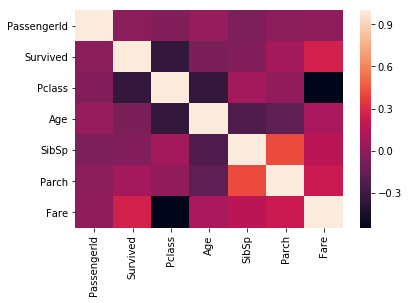

In [15]:
sns.heatmap(df_train.corr())

In [22]:
lr = LogisticRegression()

In [127]:
cv = cross_validate(lr, x, df_train.Survived, cv = 8, scoring='accuracy', return_train_score=True)

In [131]:
cv['train_score'].mean()

0.8011860210790313

In [128]:
cv['test_score'].mean()

0.7979528635778635

In [132]:
lr.fit(X, df_train.Survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
result = pd.DataFrame(lr.predict(y), columns = ['Survived'])

In [142]:
df_test[['PassengerId']].join(result).to_csv('result.csv', index=False)